*First compiled on May, 24 2017.*

# Graph abstraction for 68k PBMC cells

In [2]:
import numpy as np
import scanpy.api as sc
import matplotlib.pyplot as pl

sc.settings.verbosity = 2                # verbosity: 0=errors, 1=warnings, 2=info, 3=hints, ...
sc.settings.set_dpi(80)                  # dots (pixels) per inch determine size of inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+15.gfc4c1f4.dirty on 2017-09-19 02:14.


Here, we start from this Scanpy [example](https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17_pbmc68k_cellranger_Py.ipynb). You can rerun all preprocessing with
```
sc.pp.recipe_zheng17(adata)
```

In [5]:
adata = sc.read('zheng17')

reading file ./write/zheng17.h5


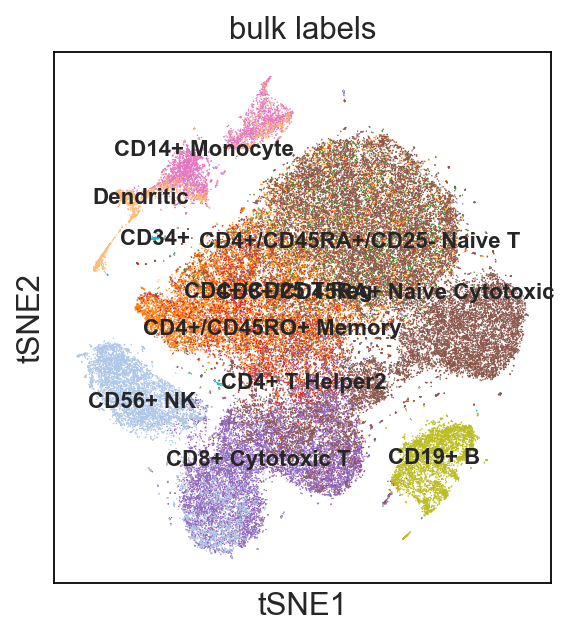

In [8]:
ax = sc.pl.tsne(adata, color='bulk_labels', legend_loc='on data', legend_fontsize=10, legend_fontweight='bold')

## Graph abstraction

In [7]:
adata = sc.read('zheng17')
sc.tl.aga(adata, node_groups='bulk_labels')
sc.write('zheng17', adata)

running Approximate Graph Abstraction (AGA)
    no root cell found, no computation of pseudotime
    using "X_pca" for building graph
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            0.9966421127  0.9959219694  0.9929382205  0.9909464717
      0.9877323508  0.9849615097  0.981762886   0.9777305722  0.9754775763]
    abstracted graph will have 11 nodes
... finished (0:00:16.207)
writing ./write/zheng17.h5


reading file ./write/zheng17.h5
... you are using a very low resolution for saving figures, adjusting to dpi=300
... saving figure to file ./figures/aga_pbmc68k.png


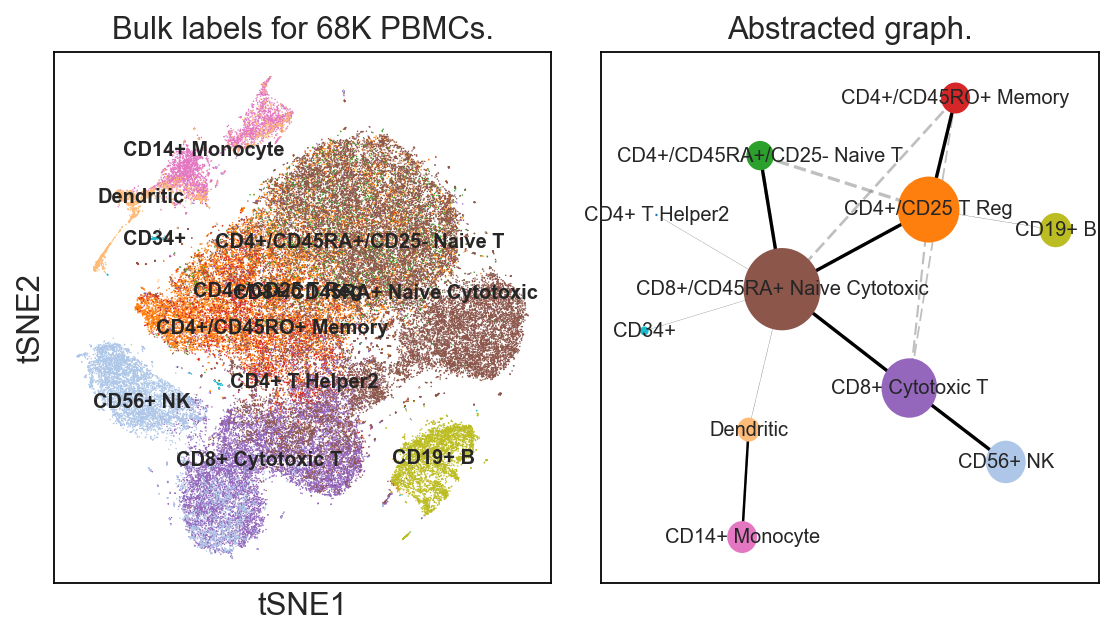

In [3]:
adata = sc.read('zheng17')
axs = sc.pl.aga(adata, legend_fontsize=9, legend_fontweight='bold', fontsize=9,
          title='Bulk labels for 68K PBMCs.',
          title_graph='Abstracted graph.', frameon=True, show=True, save='_pbmc68k')

## Measure computation time including computation of the graph

As the neighborhood graph of single cells is needed for many other analyses as well (clustering, graph-drawing visualization, diffusion maps, etc.), we don't include its  computation time in the method. If we include it, the following result is obtained.

In [4]:
adata = sc.read('zheng17')
sc.tl.aga(adata, node_groups='bulk_labels', recompute_graph=True)

reading file ./write/zheng17.h5
running Approximate Graph Abstraction (AGA)
    no root cell found, no computation of pseudotime
    using "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 10 components
    eigenvalues of transition matrix
    [ 1.            0.9966421127  0.9959219694  0.9929382205  0.9909464717
      0.9877323508  0.9849615097  0.981762886   0.9777305722  0.9754775763]
    abstracted graph will have 11 nodes
... finished (0:02:11.818)


Check that it's still the same.

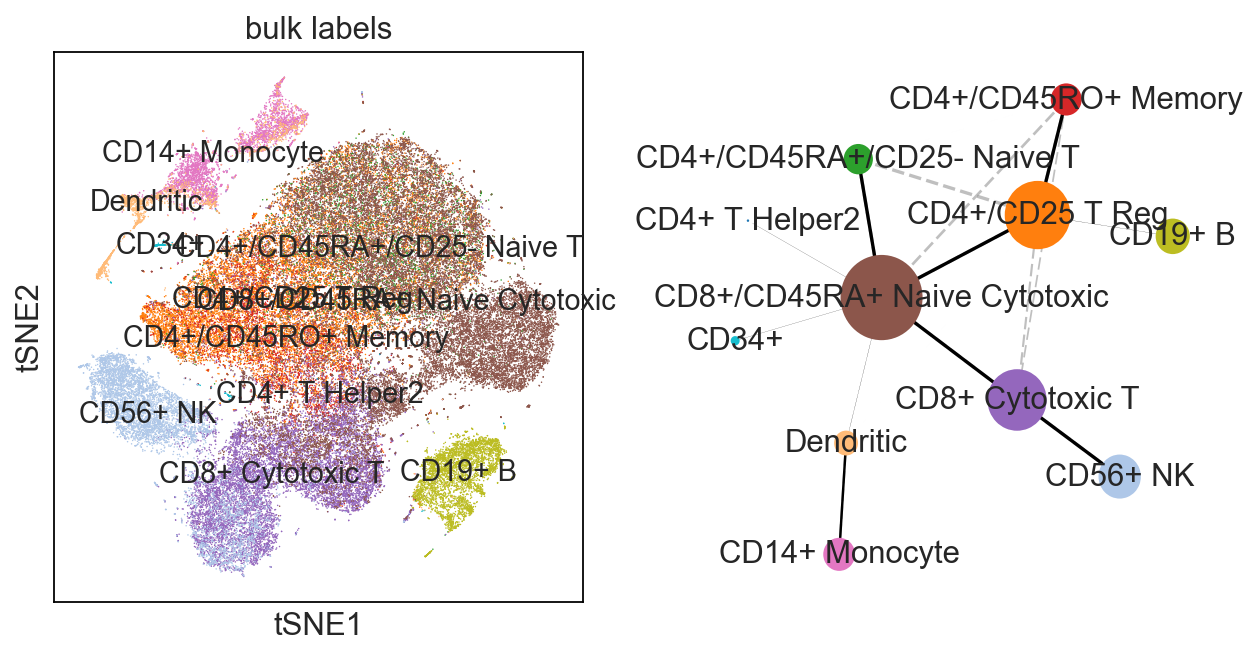

In [8]:
sc.pl.aga(adata, legend_fontsize=9, legend_fontweight='bold', fontsize=9,
          title_graph='abstracted graph', frameon=True)